In [1]:
import numpy as np
import pandas as pd
import utils
from functools import partial

In [2]:
data = pd.read_csv("./microarray_dataset_with_cancer/microarray_dataset_with_cancer.tsv", sep='\t')
data.head()

,marker_id,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample15,sample16,sample17,sample18,sample19,sample20,sample21,sample22,sample23,sample24
0,cg00000029,0.46638,0.48266,0.51227,0.43946,0.43685,0.45944,0.54287,0.36247,0.41414,...,0.60250,0.70191,0.68561,0.64013,0.64125,0.52497,0.61391,0.56662,0.65835,0.67406
1,cg00000108,0.95093,0.91982,0.93515,0.93094,0.95507,0.91868,0.92088,0.93970,0.93468,...,0.94433,0.94367,0.93404,0.92913,0.93383,0.93922,0.93267,0.92520,0.94345,0.92450
2,cg00000109,0.86531,0.85250,0.88200,0.85253,0.86033,0.84632,0.88310,0.85577,0.88923,...,0.82714,0.85656,0.88164,0.85432,0.86363,0.87633,0.85142,0.63699,0.83771,0.92340
3,cg00000165,0.27229,0.15589,0.19257,0.17025,0.21865,0.17974,0.16736,0.14384,0.20388,...,0.24229,0.19355,0.25771,0.24671,0.24590,0.25792,0.20982,0.34360,0.21486,0.23951
4,cg00000236,0.71183,0.74230,0.71943,0.70571,0.68668,0.70975,0.74568,0.69681,0.73256,...,0.80780,0.83356,0.80090,0.78956,0.83640,0.78277,0.79794,0.80515,0.85273,0.83614


In [3]:
map_df = utils.preprocess_map_file('../data/hm450.hg19.manifest.bed')

In [4]:
# map_data = pd.read_csv("../data/hm27.hg19.manifest_preprocessed.bed", sep='\t')
get_chr, get_pos = utils.get_marker_to_chr_and_pos(map_df)
chr = data['marker_id'].apply(get_chr)
pos = data['marker_id'].apply(get_pos)
data = data.drop('marker_id', axis=1)
data = data.astype(np.float64) * 100
data['chrBase'] = list(map(lambda tup: ".".join([str(tup[0]), str(tup[1])]), zip(chr, pos)))
cols = list(data.columns[-1:]) + list(data.columns[:-1])
data = data[cols]

In [5]:
data

,chrBase,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample15,sample16,sample17,sample18,sample19,sample20,sample21,sample22,sample23,sample24
0,chr16.53468112,46.638,48.266,51.227,43.946,43.685,45.944,54.287,36.247,41.414,...,60.250,70.191,68.561,64.013,64.125,52.497,61.391,56.662,65.835,67.406
1,chr3.37459206,95.093,91.982,93.515,93.094,95.507,91.868,92.088,93.970,93.468,...,94.433,94.367,93.404,92.913,93.383,93.922,93.267,92.520,94.345,92.450
2,chr3.171916037,86.531,85.250,88.200,85.253,86.033,84.632,88.310,85.577,88.923,...,82.714,85.656,88.164,85.432,86.363,87.633,85.142,63.699,83.771,92.340
3,chr1.91194674,27.229,15.589,19.257,17.025,21.865,17.974,16.736,14.384,20.388,...,24.229,19.355,25.771,24.671,24.590,25.792,20.982,34.360,21.486,23.951
4,chr8.42263294,71.183,74.230,71.943,70.571,68.668,70.975,74.568,69.681,73.256,...,80.780,83.356,80.090,78.956,83.640,78.277,79.794,80.515,85.273,83.614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485572,chr6.68232042,94.209,93.334,95.008,51.692,52.541,94.636,52.414,51.423,5.060,...,3.785,2.731,47.045,94.016,52.470,53.653,53.358,53.915,51.309,49.018
485573,chr3.14658866,2.931,52.284,3.789,94.779,51.048,53.855,51.792,3.808,94.998,...,53.483,52.231,58.286,5.469,50.722,71.472,3.775,95.828,5.180,51.338
485574,chr15.45999823,8.026,52.461,8.549,94.293,9.158,55.053,7.587,52.795,53.145,...,93.868,9.489,57.012,54.900,8.685,8.960,52.455,55.915,54.651,9.811
485575,chr2.12148220,49.495,45.344,2.343,94.121,2.020,44.757,2.704,94.395,93.345,...,48.340,50.346,39.841,2.717,2.930,47.334,45.595,39.387,2.739,47.740


In [6]:
data.to_csv('../data/microarray_dataset_with_cancer_chr_pos.tsv', index=False, sep='\t')

In [7]:
data = utils.preprocess_data('../data/microarray_dataset_with_cancer_chr_pos.tsv')

In [8]:
horvath_data = pd.read_csv("../data/gb-2013-14-10-r115-S3_preprocessed.csv", sep='\t')
horvath_chr = horvath_data['marker'].apply(get_chr)
horvath_pos = horvath_data['marker'].apply(get_pos)

In [9]:
horvath_ind = []
chromosome_coords = utils.get_chromosome_coords(data['chromosome'])
for h_chr, h_pos in zip(horvath_chr, horvath_pos):
    i, j = chromosome_coords[h_chr]
    horvath_ind.append(np.searchsorted(data['position'][i:j], h_pos) + i)
    if h_pos != data["position"][horvath_ind[-1]]:
        print(h_chr, h_pos, data["position"][horvath_ind[-1]])

In [10]:
np.isnan(data.values[horvath_ind, 2:].astype(np.float64)).sum()

7

In [12]:
def gen_nans_mask(n, m, p):
    nans_mask = np.zeros((n, m - 2), dtype=bool)
    for i in horvath_ind:
        nans_mask[i] = np.random.binomial(1, p, size=m - 2)
    nans_mask = np.concatenate((np.zeros((n, 2), dtype=bool), nans_mask), axis=1)
    return nans_mask

In [15]:
results = utils.run_experiments('../data/microarray_dataset_with_cancer_chr_pos_preprocessed.tsv', 10, 4000, 10000, p_impute=0.01)

  0%|          | 0/4 [00:00<?, ?it/s]/Users/Emiliia.Lekhman/Desktop/project/tests/utils/imputation.py:105: RuntimeWarning: Mean of empty slice
  imputed_data.loc[row, columns[col + 2]] = np.nanmean(values[left:right, col])
100%|██████████| 4/4 [06:51<00:00, 102.95s/it]


In [16]:
methods = ["methyLImp", "nbp", "cytosine mean", "people mean"]

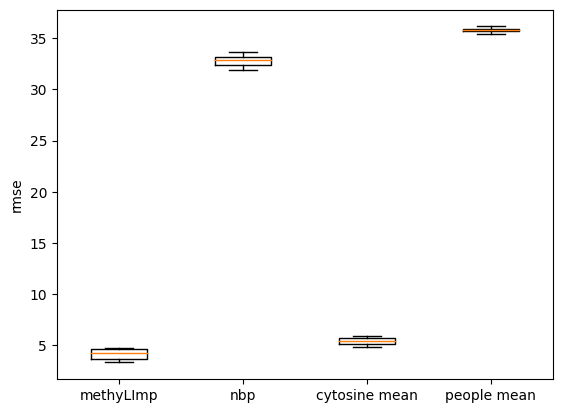

In [17]:
import matplotlib.pyplot as plt

plt.boxplot([results[method + " rmse"][3] for method in methods[:4]], labels=methods)
plt.ylabel("rmse")
plt.show()

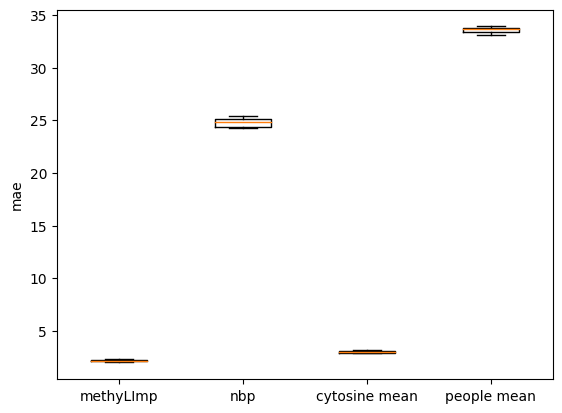

In [18]:
import matplotlib.pyplot as plt

plt.boxplot([results[method + " mae"][3] for method in methods[:4]], labels=methods)
plt.ylabel("mae")
plt.show()

In [19]:
for metric in list(results.keys())[1:]:
    results[metric] = [f"{round(np.mean(lst), 2)} +/- {round(np.std(lst), 2)}" for lst in results[metric]]
benchmark_table = pd.DataFrame(results)
bt_rmse, bt_mae = benchmark_table.drop(benchmark_table.columns[-4:], axis=1), benchmark_table.drop(benchmark_table.columns[1:5], axis=1)

In [21]:
bt_rmse["nans percent"] = bt_rmse["nans percent"] * 100
bt_rmse

,nans percent,methyLImp rmse,nbp rmse,cytosine mean rmse,people mean rmse
0,0.05,3.43 +/- 1.1,33.3 +/- 4.04,5.16 +/- 0.8,36.61 +/- 1.0
1,0.10,3.59 +/- 0.66,33.64 +/- 2.45,4.78 +/- 0.99,35.85 +/- 0.79
2,0.50,3.76 +/- 0.48,33.18 +/- 0.96,5.34 +/- 0.52,35.49 +/- 0.36
3,1.00,4.13 +/- 0.48,32.79 +/- 0.55,5.4 +/- 0.35,35.82 +/- 0.21


In [22]:
bt_mae["nans percent"] = bt_mae["nans percent"] * 100
bt_mae

,nans percent,methyLImp mae,nbp mae,cytosine mean mae,people mean mae
0,0.05,2.06 +/- 0.32,25.4 +/- 3.55,3.02 +/- 0.35,34.63 +/- 1.17
1,0.10,2.05 +/- 0.31,25.78 +/- 1.4,2.87 +/- 0.52,33.7 +/- 1.12
2,0.50,2.09 +/- 0.11,25.13 +/- 0.74,3.08 +/- 0.19,33.16 +/- 0.47
3,1.00,2.16 +/- 0.09,24.8 +/- 0.39,3.0 +/- 0.11,33.56 +/- 0.25


In [27]:
rmse_lst = []
mae_lst = []
n_nans_lst = []
p_arr = [0.0005, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1]
for p in p_arr:
    n, m = data.shape
    nans_mask = np.zeros((n, m - 2), dtype=bool)
    for i in horvath_ind:
        nans_mask[i] = np.random.binomial(1, p, size=m - 2)
    nans_mask = np.concatenate((np.zeros((n, 2), dtype=bool), nans_mask), axis=1)
    n_nans_lst.append(nans_mask.sum())
    data_with_nans = data.copy()
    data_with_nans[nans_mask] = np.nan
    rows = nans_mask.sum(axis=1)

    def impute_nbp(data_with_nans_):
        return utils.impute_1000bp(data_with_nans_, eps=300, impute_positions=nans_mask[:, 2:]).values[:, 2:]
    methyLimp = partial(utils.new_methyLImp, eps=3000, rows=rows)

    for impute in [methyLimp, impute_nbp]:
        imputed_data = impute(data_with_nans)
        
        diffs = data.values[nans_mask].astype(np.float64) - imputed_data[nans_mask[:, 2:]].astype(np.float64)
        rmse = np.sqrt(np.nanmean(diffs ** 2))
        mae = np.nanmean(np.abs(diffs))

        rmse_lst.append(rmse)
        mae_lst.append(mae)

    diffs_with_cytosine_means = (np.nanmean(data_with_nans.values[:, 2:].astype(float), axis=1)[:, None] - data.values[:, 2:].astype(float))[nans_mask[:, 2:]]

    rmse = np.sqrt(np.nanmean(diffs_with_cytosine_means ** 2))
    mae = np.nanmean(np.abs(diffs_with_cytosine_means))

    rmse_lst.append(rmse)
    mae_lst.append(mae)

    diffs_with_people_means = (np.nanmean(data_with_nans.values[:, 2:].astype(float), axis=0)[None, :] - data.values[:, 2:].astype(float))[nans_mask[:, 2:]]

    rmse = np.sqrt(np.nanmean(diffs_with_people_means ** 2))
    mae = np.nanmean(np.abs(diffs_with_people_means))

    rmse_lst.append(rmse)
    mae_lst.append(mae)

100%|██████████| 25/25 [00:00<00:00, 193.34it/s]


number of used methylations: 120
3 of them imputed by methyLImp


100%|██████████| 25/25 [00:00<00:00, 94.57it/s]


number of used methylations: 400
10 of them imputed by methyLImp


  0%|          | 0/10 [00:00<?, ?it/s]/Users/Emiliia.Lekhman/Desktop/project/tests/utils/imputation.py:131: RuntimeWarning: Mean of empty slice
  imputed_data.loc[row, columns[col + 2]] = np.nanmean(values[left:right, col])
100%|██████████| 25/25 [00:00<00:00, 31.10it/s]


number of used methylations: 1920
49 of them imputed by methyLImp


100%|██████████| 25/25 [00:01<00:00, 15.66it/s]


number of used methylations: 3680
92 of them imputed by methyLImp


100%|██████████| 25/25 [00:02<00:00, 10.42it/s]


number of used methylations: 6240
157 of them imputed by methyLImp


100%|██████████| 25/25 [00:04<00:00,  5.53it/s]


number of used methylations: 15240
387 of them imputed by methyLImp


100%|██████████| 25/25 [00:05<00:00,  4.29it/s]


number of used methylations: 34400
866 of them imputed by methyLImp


100%|██████████| 860/860 [00:00<00:00, 3964.34it/s]


In [28]:
methylimp_rmse, nbp_rmse, cytosine_rmse, people_rmse = np.array(rmse_lst).reshape(len(p_arr), 4).T

In [29]:
benchmark_table_rmse = pd.DataFrame({"Nans fraction": p_arr,
                                    "n_nans": n_nans_lst,
                                    "methyLImp": methylimp_rmse,
                                    "nbp": nbp_rmse,
                                    "Cytosine mean": cytosine_rmse,
                                    "People mean": people_rmse})
benchmark_table_rmse

,Nans fraction,n_nans,methyLImp,nbp,Cytosine mean,People mean
0,0.0005,3,1.348198,12.292214,4.067008,36.708050
1,0.0010,10,1.720362,33.399132,2.432127,32.514923
2,0.0050,48,4.799976,20.456944,5.725442,34.015234
3,0.0100,92,3.275233,27.279765,4.088604,33.165244
4,0.0200,156,3.056342,28.129874,4.238046,33.526251
5,0.0500,381,3.090468,26.290336,4.326265,33.583195
6,0.1000,860,3.417245,27.079651,4.216986,33.834871


In [30]:
methylimp_mae, nbp_mae, cytosine_mae, people_mae = np.array(mae_lst).reshape(len(p_arr), 4).T

In [31]:
benchmark_table_mae = pd.DataFrame({"Nans fraction": p_arr,
                                    "n_nans": n_nans_lst,
                                    "methyLImp": methylimp_mae,
                                    "nbp": nbp_mae,
                                    "Cytosine mean": cytosine_mae,
                                    "People mean": people_mae})
benchmark_table_mae

,Nans fraction,n_nans,methyLImp,nbp,Cytosine mean,People mean
0,0.0005,3,1.066708,8.842556,3.175304,32.051594
1,0.0010,10,1.440432,20.874020,1.730991,30.194595
2,0.0050,48,2.655459,13.778673,3.211302,31.132159
3,0.0100,92,2.036742,17.529623,2.740581,30.679806
4,0.0200,156,1.872717,17.116219,2.584244,31.016502
5,0.0500,381,2.037385,16.152882,2.851261,30.768029
6,0.1000,860,2.092475,16.024086,2.632576,31.192351
